In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,precision_score, recall_score
from sklearn.metrics import roc_auc_score,roc_curve
    
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

import warnings
warnings.filterwarnings('ignore')

## Step 1 : Problem Statement

## Step 2: Data Gathering

In [15]:
df = pd.read_csv(r"D:\Jupyter python\My Python\CodeSoft\Titanic-Dataset.csv")  
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


## Step 3: EDA

In [16]:
df.shape

(891, 12)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [19]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


<Axes: >

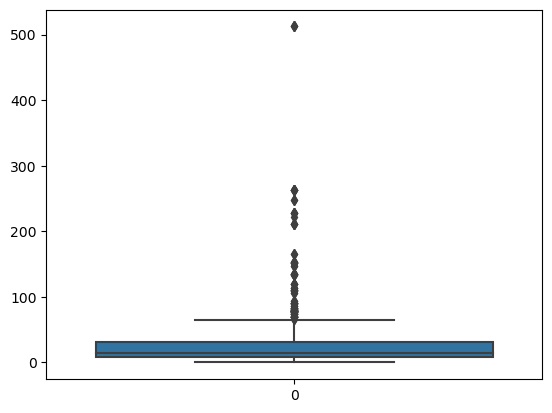

In [20]:
sns.boxplot(df["Fare"])

## Step 4 : Feature Engineering

In [21]:
df = df.drop("Name", axis=1)

In [22]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [23]:
df["Sex"] = df["Sex"].replace({"male":0,"female":1})

In [24]:
df["Embarked"] = df["Embarked"].replace({"S":0,"C":1,"Q":2})

In [25]:
df["Embarked"].unique()

array([ 0.,  1.,  2., nan])

### Converting textual data to numerical

In [26]:
L = LabelEncoder()

In [27]:
df["Ticket"]= L.fit_transform(df["Ticket"])

In [28]:
df["Cabin"]= L.fit_transform(df["Cabin"])

### Handling Null Values

In [29]:
df["Age"].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [30]:
df["Embarked"] = df["Embarked"].replace({np.nan:0})

In [31]:
df["Age"].mean()

29.69911764705882

In [32]:
df["Age"] = df["Age"].replace({np.nan:29})

### To find outliers

In [33]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1

lower_tail = Q1- 1.5 * IQR
upper_tail = Q3+ 1.5 * IQR

outliers = (df < lower_tail) | (df > upper_tail)
outliers_count = outliers.sum()
outliers_count

PassengerId      0
Pclass           0
Sex              0
Age             66
SibSp           46
Parch          213
Ticket           0
Fare           116
Cabin          204
Embarked         0
Survived         0
dtype: int64

In [34]:
# To replace outliers
def Finding_outliar1(df,columns):
    for column in columns:
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1

            lower_tail1 = q1 - 1.5 * iqr
            upper_tail1 = q3 + 1.5 * iqr
            print(lower_tail1)
            print(upper_tail1)
            
            df[column] = df[column].apply(lambda x : upper_tail1 if x > upper_tail1 else (lower_tail1 if x < lower_tail1 else x))
columns = ["Age","SibSp","Parch","Fare","Cabin"]
Finding_outliar1(df,columns)

2.5
54.5
-1.5
2.5
0.0
0.0
-26.724
65.6344
147.0
147.0


### Standard Scaler

In [35]:
df.iloc[:,:10]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,0,22.0,1.0,0.0,523,7.2500,147.0,0.0
1,2,1,1,38.0,1.0,0.0,596,65.6344,147.0,1.0
2,3,3,1,26.0,0.0,0.0,669,7.9250,147.0,0.0
3,4,1,1,35.0,1.0,0.0,49,53.1000,147.0,0.0
4,5,3,0,35.0,0.0,0.0,472,8.0500,147.0,0.0
...,...,...,...,...,...,...,...,...,...,...
886,887,2,0,27.0,0.0,0.0,101,13.0000,147.0,0.0
887,888,1,1,19.0,0.0,0.0,14,30.0000,147.0,0.0
888,889,3,1,29.0,1.0,0.0,675,23.4500,147.0,0.0
889,890,1,0,26.0,0.0,0.0,8,30.0000,147.0,1.0


In [36]:
Std = StandardScaler()
Standard_array = Std.fit_transform(df.iloc[:,:10])
Df_Std = pd.DataFrame(Standard_array, columns = df.iloc[:,:10].columns)
Df_Std.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,-1.730108,0.827377,-0.737695,-0.600420,0.810220,0.0,0.918966,-0.820552,0.0,-0.568837
1,-1.726220,-1.566107,1.355574,0.726854,0.810220,0.0,1.282625,2.031623,0.0,1.005181
2,-1.722332,0.827377,1.355574,-0.268602,-0.602512,0.0,1.646283,-0.787578,0.0,-0.568837
3,-1.718444,-1.566107,1.355574,0.477990,0.810220,0.0,-1.442322,1.419297,0.0,-0.568837
4,-1.714556,0.827377,-0.737695,0.477990,-0.602512,0.0,0.664904,-0.781471,0.0,-0.568837


In [37]:
df.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Survived       0
dtype: int64

##  Step 5 : Feature Selection

In [38]:
#pearson's coeff of correalation R = -1 to +1
Df_Std.corr()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.035144,-0.042939,0.036001,-0.072778,NaN,-0.056554,0.003243,NaN,-0.030467
Pclass,-0.035144,1.000000,-0.131900,-0.334977,0.023180,NaN,0.319869,-0.715300,NaN,0.045702
Sex,-0.042939,-0.131900,1.000000,-0.076633,0.167885,NaN,-0.059372,0.234969,NaN,0.116569
Age,0.036001,-0.334977,-0.076633,1.000000,-0.250125,NaN,-0.074074,0.140453,NaN,-0.001409
SibSp,-0.072778,0.023180,0.167885,-0.250125,1.000000,NaN,0.032401,0.349615,NaN,-0.045743
Parch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ticket,-0.056554,0.319869,-0.059372,-0.074074,0.032401,NaN,1.000000,-0.140403,NaN,0.043798
Fare,0.003243,-0.715300,0.234969,0.140453,0.349615,NaN,-0.140403,1.000000,NaN,0.010739
Cabin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embarked,-0.030467,0.045702,0.116569,-0.001409,-0.045743,NaN,0.043798,0.010739,NaN,1.000000


<Axes: >

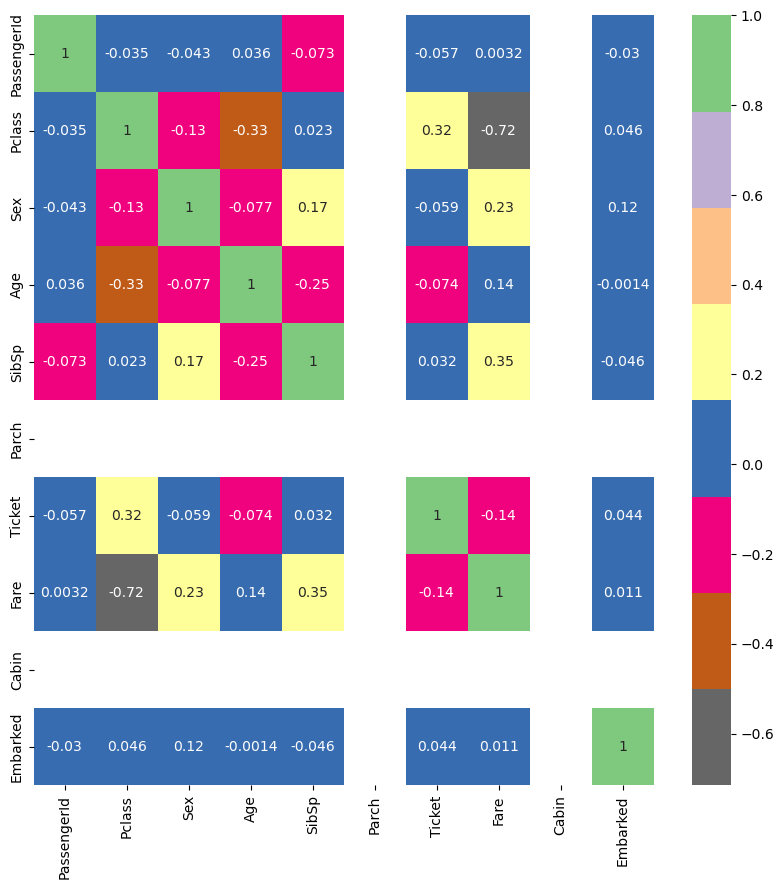

In [39]:
plt.figure(figsize=(10,10))
sns.heatmap(Df_Std.corr(),annot= True, cmap = plt.cm. Accent_r)

In [40]:
df1 = Df_Std#.drop(["Parch","Cabin"],axis=1)

In [41]:
df1.shape

(891, 10)

### train_test_split

In [42]:
x = df1
y = df["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

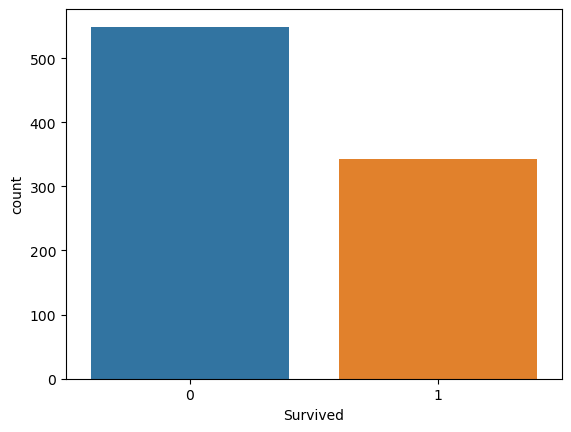

In [43]:
sns.countplot(x=df["Survived"]) 

In [44]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

# 1.Logistic Regression

In [45]:
log_reg = LogisticRegression()  

In [46]:
log_reg_model = log_reg.fit(xtrain,ytrain)

### Training

In [47]:
ytrain_pre_log = log_reg_model.predict(xtrain)
ytrain_pre_log

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [48]:
accuracy_training = accuracy_score(ytrain,ytrain_pre_log)
print(f"Accuracy : {accuracy_training}")
 
Training_confusion_matrix = confusion_matrix(ytrain,ytrain_pre_log)
print(Training_confusion_matrix)
 

class_report_training = classification_report(ytrain,ytrain_pre_log)
print(class_report_training)

Accuracy : 0.7961476725521669
[[325  59]
 [ 68 171]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       384
           1       0.74      0.72      0.73       239

    accuracy                           0.80       623
   macro avg       0.79      0.78      0.78       623
weighted avg       0.79      0.80      0.80       623



### Testing

In [49]:
ytest_pre_log = log_reg_model.predict(xtest)

In [50]:
accuracy_testing = accuracy_score(ytest,ytest_pre_log)
print(f"Accuracy : {accuracy_testing}")
 
Testing_confusion_matrix = confusion_matrix(ytest,ytest_pre_log)
print(Testing_confusion_matrix)
 

class_report_testing = classification_report(ytest,ytest_pre_log)
print(class_report_testing)

Accuracy : 0.8059701492537313
[[145  20]
 [ 32  71]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       165
           1       0.78      0.69      0.73       103

    accuracy                           0.81       268
   macro avg       0.80      0.78      0.79       268
weighted avg       0.80      0.81      0.80       268



# 2.Decision Tree 

In [51]:
x1 = df1
y1 = df["Survived"]
x1

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,-1.730108,0.827377,-0.737695,-0.600420,0.810220,0.0,0.918966,-0.820552,0.0,-0.568837
1,-1.726220,-1.566107,1.355574,0.726854,0.810220,0.0,1.282625,2.031623,0.0,1.005181
2,-1.722332,0.827377,1.355574,-0.268602,-0.602512,0.0,1.646283,-0.787578,0.0,-0.568837
3,-1.718444,-1.566107,1.355574,0.477990,0.810220,0.0,-1.442322,1.419297,0.0,-0.568837
4,-1.714556,0.827377,-0.737695,0.477990,-0.602512,0.0,0.664904,-0.781471,0.0,-0.568837
...,...,...,...,...,...,...,...,...,...,...
886,1.714556,-0.369365,-0.737695,-0.185647,-0.602512,0.0,-1.183277,-0.539655,0.0,-0.568837
887,1.718444,-1.566107,1.355574,-0.849284,-0.602512,0.0,-1.616678,0.290823,0.0,-0.568837
888,1.722332,0.827377,1.355574,-0.019738,0.810220,0.0,1.676173,-0.029155,0.0,-0.568837
889,1.726220,-1.566107,-0.737695,-0.268602,-0.602512,0.0,-1.646568,0.290823,0.0,1.005181


In [52]:
x1train,x1test,y1train,y1test=train_test_split(x1,y1,test_size=0.3,random_state=0)

In [53]:
dec_tree = DecisionTreeClassifier()
dec_tree_model = dec_tree.fit(x1train,y1train)
dec_tree_model

DecisionTreeClassifier()

### Training

In [54]:
y1train_pred = dec_tree_model.predict(x1train)
y1train_pred

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,

In [55]:
accuracy_training = accuracy_score(y1train,y1train_pred)
print(f"Accuracy = {accuracy_training}")

Training_classification_report = classification_report(y1train,y1train_pred)
print(f"classification_report = {Training_classification_report}")

Training_confusion_matrix = confusion_matrix(y1train,y1train_pred)
print(f"confusion_matrix = {Training_confusion_matrix}")

Accuracy = 1.0
classification_report =               precision    recall  f1-score   support

           0       1.00      1.00      1.00       381
           1       1.00      1.00      1.00       242

    accuracy                           1.00       623
   macro avg       1.00      1.00      1.00       623
weighted avg       1.00      1.00      1.00       623

confusion_matrix = [[381   0]
 [  0 242]]


### Testing

In [56]:
y1test_pred = dec_tree_model.predict(x1test)

In [57]:
accuracy_testing = accuracy_score(y1test,y1test_pred)
print(f"Accuracy = {accuracy_testing}")

Testing_classification_report = classification_report(y1test,y1test_pred)
print(f"classification_report = {Testing_classification_report}")

Testing_confusion_matrix = confusion_matrix(y1test,y1test_pred)
print(f"confusion_matrix = {Testing_confusion_matrix}")

Accuracy = 0.7388059701492538
classification_report =               precision    recall  f1-score   support

           0       0.81      0.76      0.79       168
           1       0.64      0.70      0.67       100

    accuracy                           0.74       268
   macro avg       0.72      0.73      0.73       268
weighted avg       0.75      0.74      0.74       268

confusion_matrix = [[128  40]
 [ 30  70]]


## Hyperparameter Tunning

In [58]:
Hyper_Decision = {
    "criterion" : ["entropy","gini"],
    "max_depth" : np.arange(2,10),
    "min_samples_split" : np.arange(2,20),
    "min_samples_leaf" : np.arange(2,20),
} 

In [59]:
Random_search = RandomizedSearchCV(dec_tree_model,Hyper_Decision,cv=5)

In [60]:
Random_search.fit(x1train,y1train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [61]:
Random_search.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=9, min_samples_split=16)

In [62]:
Decision_hyper_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=3,
                       min_samples_split=7)
#DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=5)

In [63]:
Decision_hyper_model.fit(x1train,y1train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=3,
                       min_samples_split=7)

### Training

In [64]:
y1train_pred_hyper = Decision_hyper_model.predict(x1train)
y1train_pred_hyper

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,

In [65]:
accuracy_Training_hyper = accuracy_score(y1train,y1train_pred_hyper)
print(f"Accuracy = {accuracy_Training_hyper}")

Training_classification_report_hyper = classification_report(y1train,y1train_pred_hyper)
print(f"classification_report = {Training_classification_report_hyper}")

Training_confusion_matrix_hyper = confusion_matrix(y1train,y1train_pred_hyper)
print(f"confusion_matrix = {Training_confusion_matrix_hyper}")

Accuracy = 0.8346709470304976
classification_report =               precision    recall  f1-score   support

           0       0.84      0.91      0.87       381
           1       0.83      0.72      0.77       242

    accuracy                           0.83       623
   macro avg       0.83      0.81      0.82       623
weighted avg       0.83      0.83      0.83       623

confusion_matrix = [[345  36]
 [ 67 175]]


### Testing

In [66]:
y1test_pred_hyper = Decision_hyper_model.predict(x1test)

In [67]:
accuracy_testing_hyper = accuracy_score(y1test,y1test_pred_hyper)
print(f"Accuracy = {accuracy_testing_hyper}")

testing_classification_report_hyper = classification_report(y1test,y1test_pred_hyper)
print(f"classification_report = {testing_classification_report_hyper}")

testing_confusion_matrix_hyper = confusion_matrix(y1test,y1test_pred_hyper)
print(f"confusion_matrix = {testing_confusion_matrix_hyper}")

Accuracy = 0.8246268656716418
classification_report =               precision    recall  f1-score   support

           0       0.85      0.87      0.86       168
           1       0.77      0.75      0.76       100

    accuracy                           0.82       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268

confusion_matrix = [[146  22]
 [ 25  75]]
